In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from datetime import datetime

In [5]:
tc=pd.read_csv('/content/drive/MyDrive/Coders_cave/covid_19_india.csv')
cv=pd.read_csv('/content/drive/MyDrive/Coders_cave/covid_vaccine_statewise.csv')
swt=pd.read_csv('/content/drive/MyDrive/Coders_cave/StatewiseTestingDetails.csv')

In [6]:
tc.shape

(18110, 9)

In [7]:
tc.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


**DATA CLEANING**

---




In [8]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [9]:
pd.isnull(tc).sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [10]:
tc.drop(['Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1, inplace=True)

In [11]:
tc.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [12]:
tc.rename(columns={'Confirmed':'Total_cases'}, inplace=True)

In [13]:
tc.groupby('State/UnionTerritory').sum()

<ipython-input-13-c2246290872e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tc.groupby('State/UnionTerritory').sum()


,Cured,Deaths,Total_cases
State/UnionTerritory,,,
Andaman and Nicobar Islands,1848286,27136,1938498
Andhra Pradesh,370426530,2939367,392432753
Arunachal Pradesh,6588149,26799,7176907
Assam,92678680,638323,99837011
Bihar,125122902,1093466,132231166
Bihar****,1402468,18881,1430909
Cases being reassigned to states,0,0,345565
Chandigarh,10117035,147694,10858627
Chhattisgarh,151609364,2063920,163776262


In [15]:
tc.head()

,Date,State/UnionTerritory,Cured,Deaths,Total_cases,Active_cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [14]:
tc['Active_cases']= tc['Total_cases']-(tc['Cured']+tc['Deaths'])


In [16]:
tc.head()

,Date,State/UnionTerritory,Cured,Deaths,Total_cases,Active_cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


Vaccination data

In [20]:
cv.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [21]:
vxn= cv.drop(['Transgender (Doses Administered)', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'], axis=1, inplace=True)

In [22]:
cv.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [23]:
vxn=cv.drop(['Sputnik V (Doses Administered)','AEFI','Sessions'],axis=1, inplace=True)

In [24]:
cv.rename(columns= {'Total Individuals Vaccinated' : 'Total vaccinations'}, inplace=True)
cv.head()

,Updated On,State,Total Doses Administered,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total vaccinations
0,16/01/2021,India,48276.0,2957.0,48276.0,0.0,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,4954.0,58604.0,0.0,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,6583.0,99449.0,0.0,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,7951.0,195525.0,0.0,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,10504.0,251280.0,0.0,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [25]:
cv.rename(columns= {'Total vaccinations' : 'Total_vaccinations'}, inplace=True)

**DATA VISUALISATION**

---






Top 10 States with the most cases

<function matplotlib.pyplot.show(close=None, block=None)>

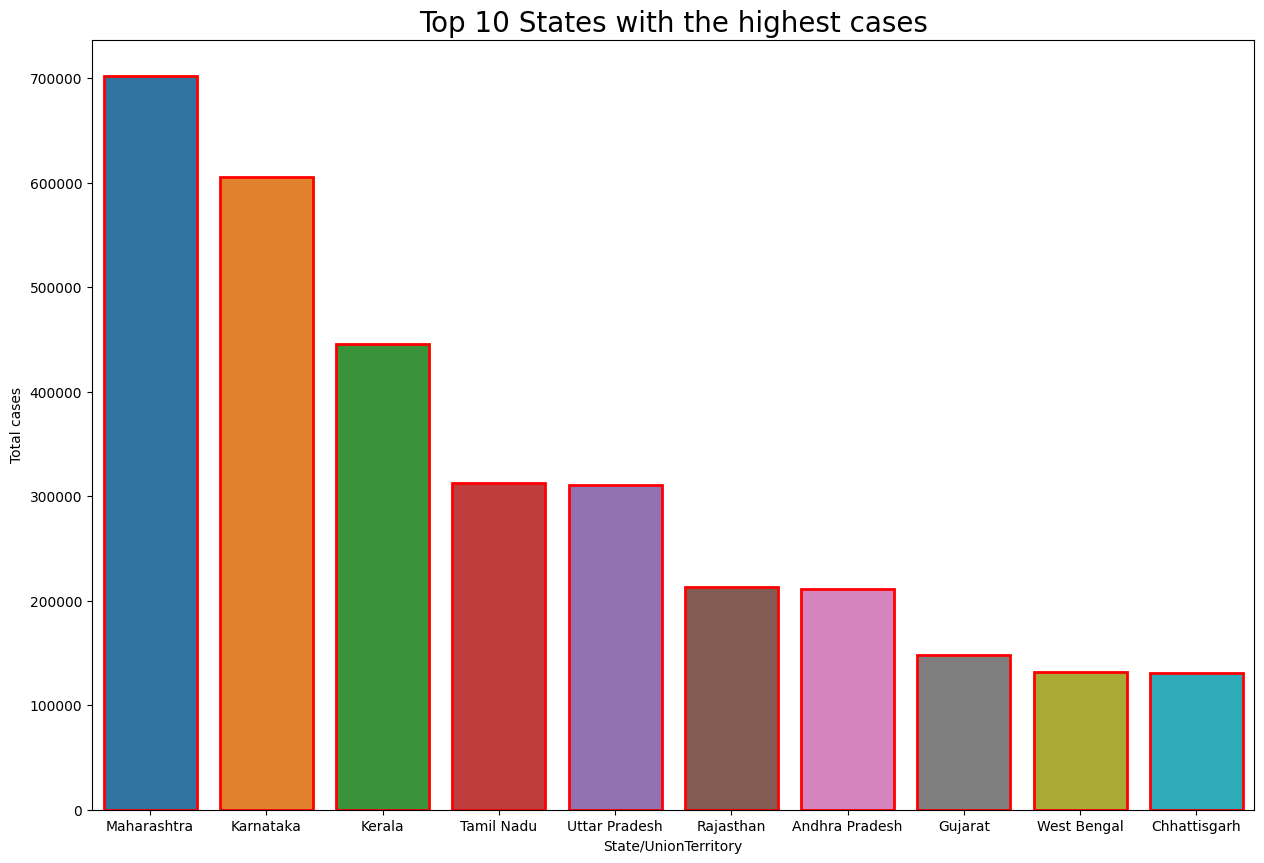

In [17]:
t10= tc.groupby(by= 'State/UnionTerritory').max()[['Active_cases','Date']].sort_values(by=['Active_cases'], ascending=False).reset_index()
fig=plt.figure(figsize=(15,10))
plt.title("Top 10 States with the highest cases",size=20)
ax= sns.barplot(data=t10.iloc[:10], y='Active_cases', x='State/UnionTerritory', linewidth=2, edgecolor='red')
plt.xlabel("State/UnionTerritory")
plt.ylabel("Total cases")
plt.show

Top 10 states with highest Deaths

Text(0, 0.5, 'Deaths')

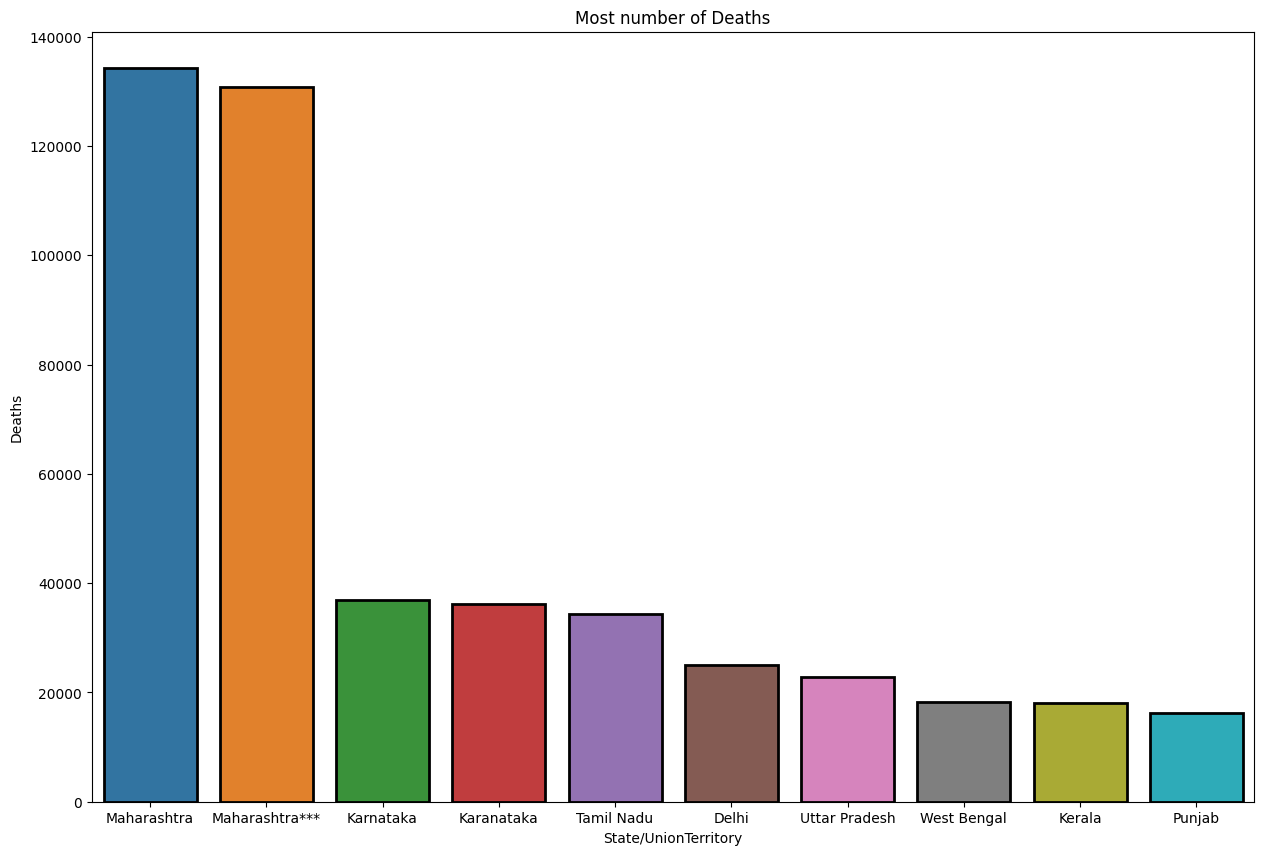

In [18]:
td= tc.groupby(by='State/UnionTerritory').max()[['Deaths','Date']].sort_values(by=['Deaths'], ascending=False).reset_index()
fig=plt.figure(figsize=(15,10))
plt.title("Most number of Deaths")
ax= sns.barplot(data=td[:10], y='Deaths',x='State/UnionTerritory', linewidth=2, edgecolor='black')
plt.xlabel("State/UnionTerritory")
plt.ylabel('Deaths')

GrowthTrend

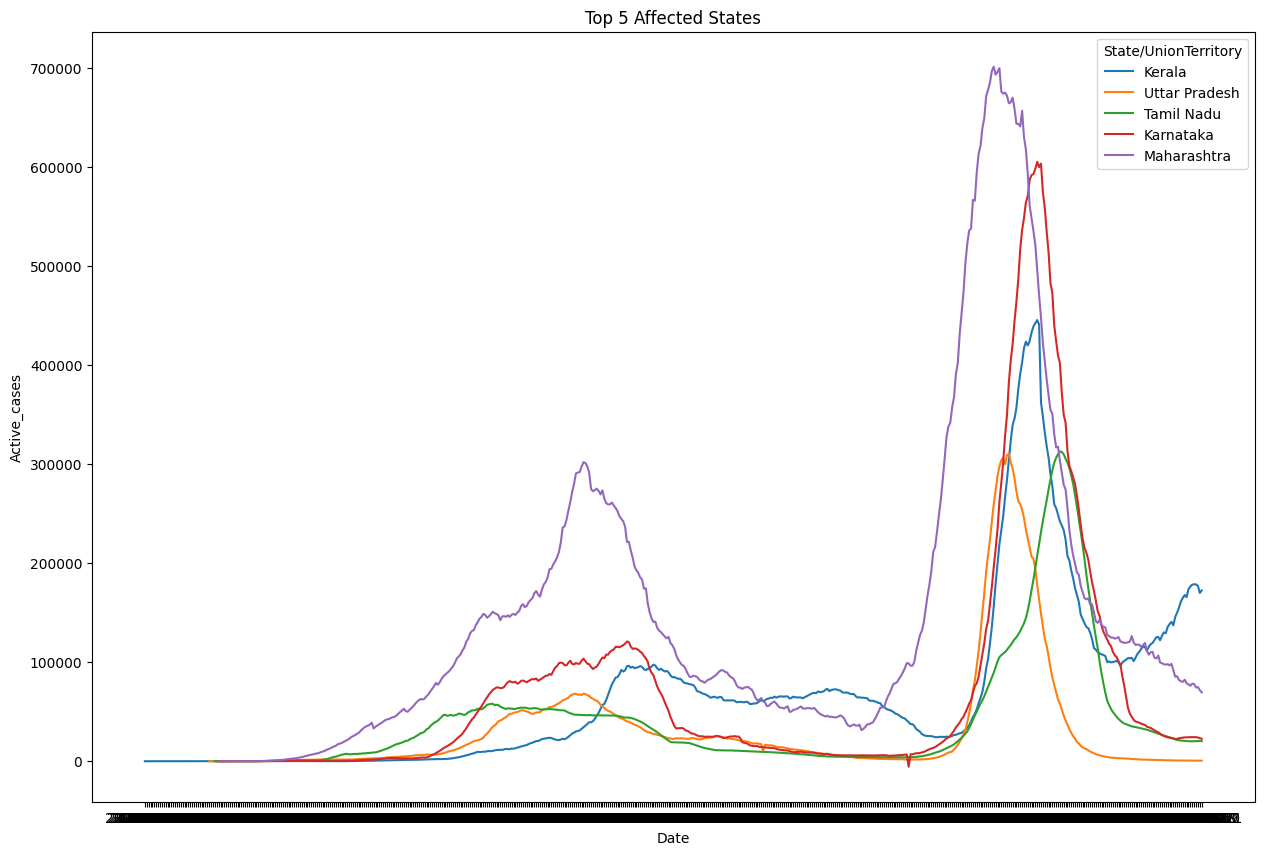

In [19]:
fig=plt.figure(figsize=(15,10))
ax = sns.lineplot(
    data=tc[tc["State/UnionTerritory"].isin(['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Uttar Pradesh'])],
    x='Date',
    y='Active_cases',
    hue='State/UnionTerritory'
)
ax.set_title("Top 5 Affected States")
plt.show()

In [36]:
males= cv["Male(Individuals Vaccinated)"].sum()
females= cv["Female(Individuals Vaccinated)"].sum()
fig=px.pie(names=['Male','Female'], values=[males,females], title='Males and Females vaccinated')
fig.show()

In [27]:
vaccine= cv[cv.State!='India']
vaccine.head()

,Updated On,State,Total Doses Administered,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total_vaccinations
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,23.0,0.0,12.0,11.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,23.0,0.0,12.0,11.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,2.0,42.0,0.0,29.0,13.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,2.0,89.0,0.0,53.0,36.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,3.0,124.0,0.0,67.0,57.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [28]:
maxvax= vaccine.groupby('State')['Total_vaccinations'].sum().to_frame('Total_vaccinations')
maxvax= maxvax.sort_values('Total_vaccinations', ascending=False)[:5]
maxvax.head()

,Total_vaccinations
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


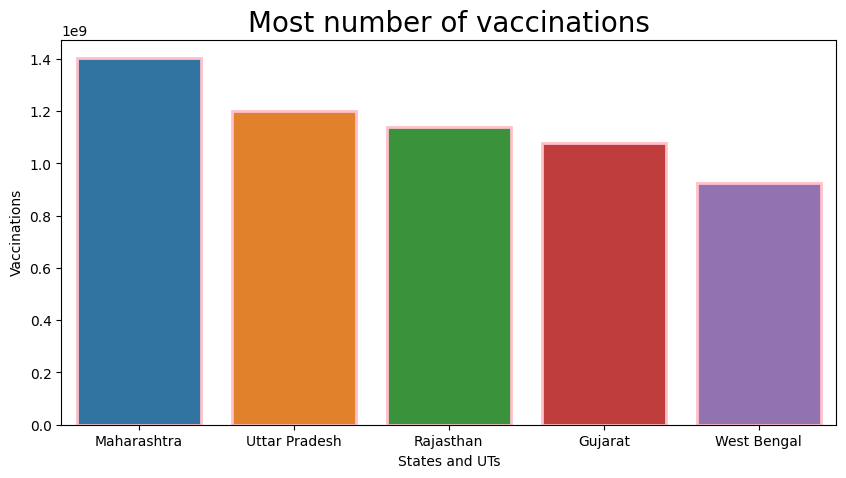

In [29]:
fig= plt.figure(figsize=(10,5))
plt.title("Most number of vaccinations", size=20)
x= sns.barplot(data=maxvax.iloc[:10], y=maxvax.Total_vaccinations, x=maxvax.index, linewidth=2, edgecolor='pink')
plt.xlabel("States and UTs")
plt.ylabel("Vaccinations")
plt.show()

In [37]:
coviz= cv["CoviShield (Doses Administered)"].sum()
covax= cv[" Covaxin (Doses Administered)"].sum()
fig=px.pie(names=['CoviShield','Covaxin'], values=[coviz,covax], title='CoviShield vs Covaxin')
fig.show()

In [31]:
cv.columns

Index(['Updated On', 'State', 'Total Doses Administered', ' Sites ',
       'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       ' Covaxin (Doses Administered)', 'CoviShield (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total_vaccinations'],
      dtype='object')

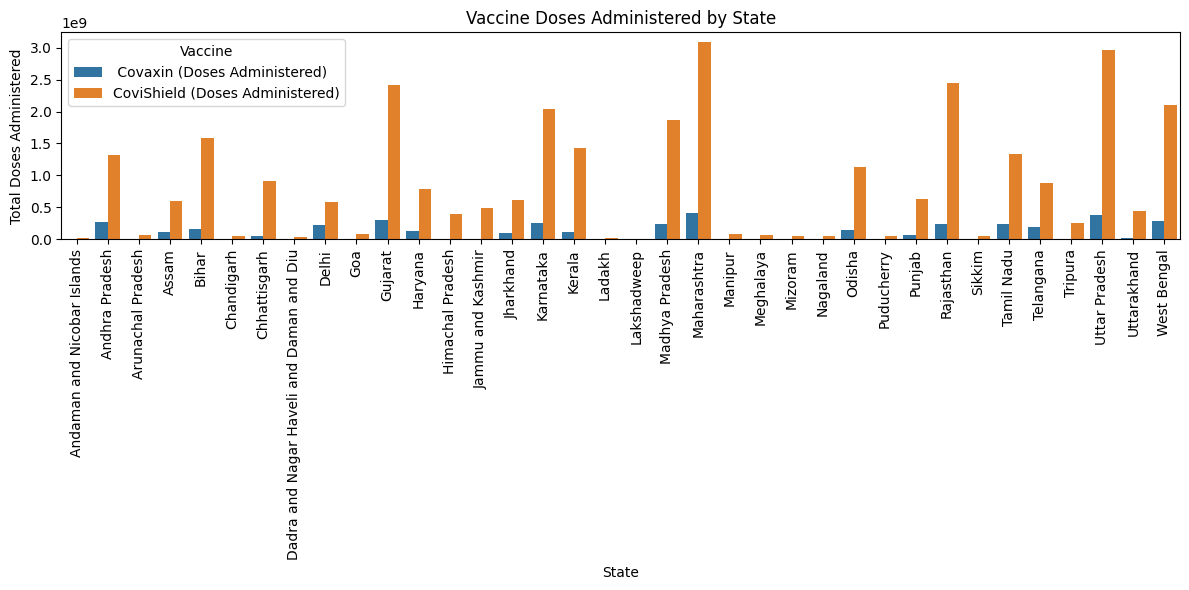

In [35]:
vaccine_data = vaccine.groupby('State')[[' Covaxin (Doses Administered)', 'CoviShield (Doses Administered)']].sum().reset_index()

# Melt the DataFrame to create a long-form dataset suitable for plotting
vaccine_data_melted = vaccine_data.melt(id_vars='State', var_name='Vaccine', value_name='Doses Administered')

# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=vaccine_data_melted, x='State', y='Doses Administered', hue='Vaccine')
plt.title('Vaccine Doses Administered by State')
plt.xlabel('State')
plt.ylabel('Total Doses Administered')
plt.xticks(rotation=90)
plt.legend(title='Vaccine')
plt.tight_layout()
plt.show()
